In [3]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\Ruwan Hasitha\OneDrive - University of Hertfordshire\Final project\UK-HPI-full-file-2024-03.csv"
df = pd.read_csv(file_path)

# Display basic information in the dataset
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140580 entries, 0 to 140579
Data columns (total 54 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Date                    140580 non-null  object 
 1   RegionName              140580 non-null  object 
 2   AreaCode                140580 non-null  object 
 3   AveragePrice            140580 non-null  float64
 4   Index                   140580 non-null  float64
 5   IndexSA                 4929 non-null    float64
 6   1m%Change               140156 non-null  float64
 7   12m%Change              135768 non-null  float64
 8   AveragePriceSA          4929 non-null    float64
 9   SalesVolume             136113 non-null  float64
 10  DetachedPrice           134031 non-null  float64
 11  DetachedIndex           134031 non-null  float64
 12  Detached1m%Change       133641 non-null  float64
 13  Detached12m%Change      129375 non-null  float64
 14  SemiDetachedPrice   

In [4]:
# Handle missing values in dataset
df = df.dropna()  # or use df.fillna() to fill missing values

# Convert 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Extract year and month
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month


        AveragePrice        Index      IndexSA    1m%Change   12m%Change  \
count    1862.000000  1862.000000  1862.000000  1862.000000  1862.000000   
mean   227547.060270   119.253019   118.200898     0.378183     4.640937   
std     89720.297677    18.401391    18.214374     1.363162     3.922547   
min    112007.912300    77.290881    77.240070    -8.300000    -4.700000   
25%    159791.707500   104.862178   103.253397    -0.259293     1.834386   
50%    207644.500000   118.784230   118.157159     0.402311     4.350095   
75%    265934.750000   130.820801   129.375000     1.041707     6.988371   
max    542387.000000   162.000000   159.600000     8.400000    20.555012   

       AveragePriceSA    SalesVolume  DetachedPrice  DetachedIndex  \
count     1862.000000    1862.000000   1.862000e+03    1862.000000   
mean    225809.438100   21564.191192   3.706507e+05     119.700168   
std      89757.488601   28885.745314   1.745639e+05      18.608346   
min     110711.944000    1003.00000

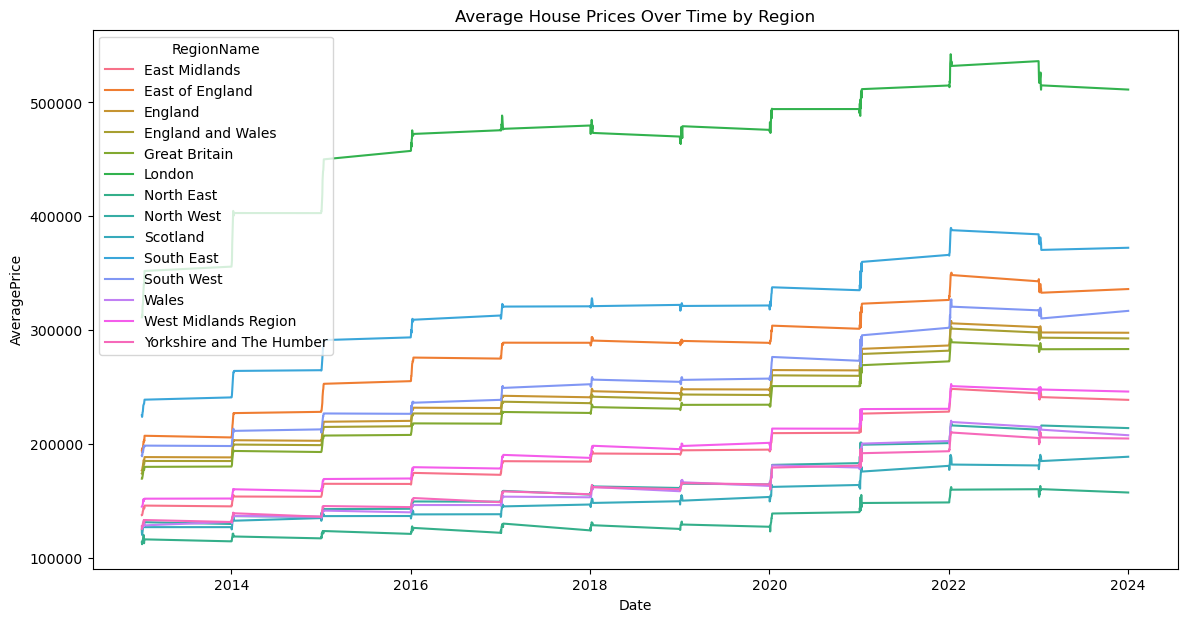

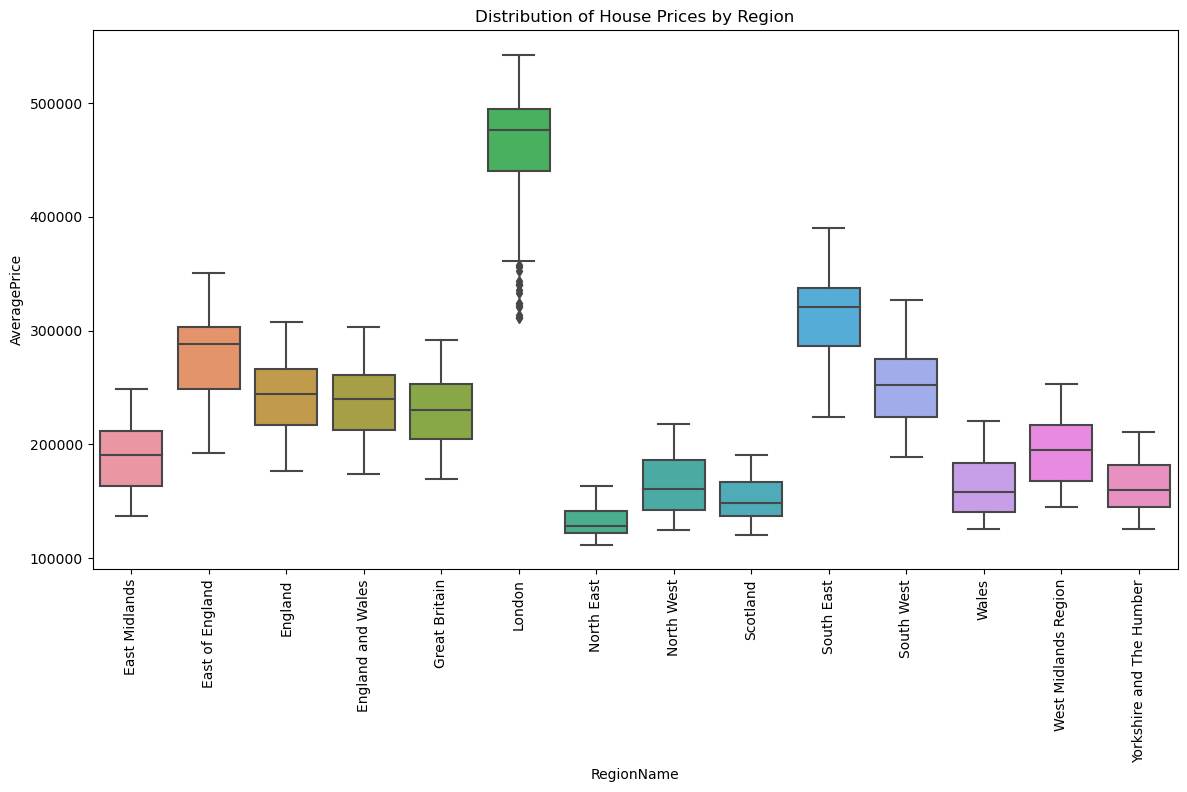

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
print(df.describe())

# Line plot of average prices over time for different regions
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='Date', y='AveragePrice', hue='RegionName')
plt.title('Average House Prices Over Time by Region')
plt.show()

# Boxplot of average prices by property type
plt.figure(figsize=(14, 7))
sns.boxplot(data=df, x='RegionName', y='AveragePrice')
plt.title('Distribution of House Prices by Region')
plt.xticks(rotation=90)
plt.show()

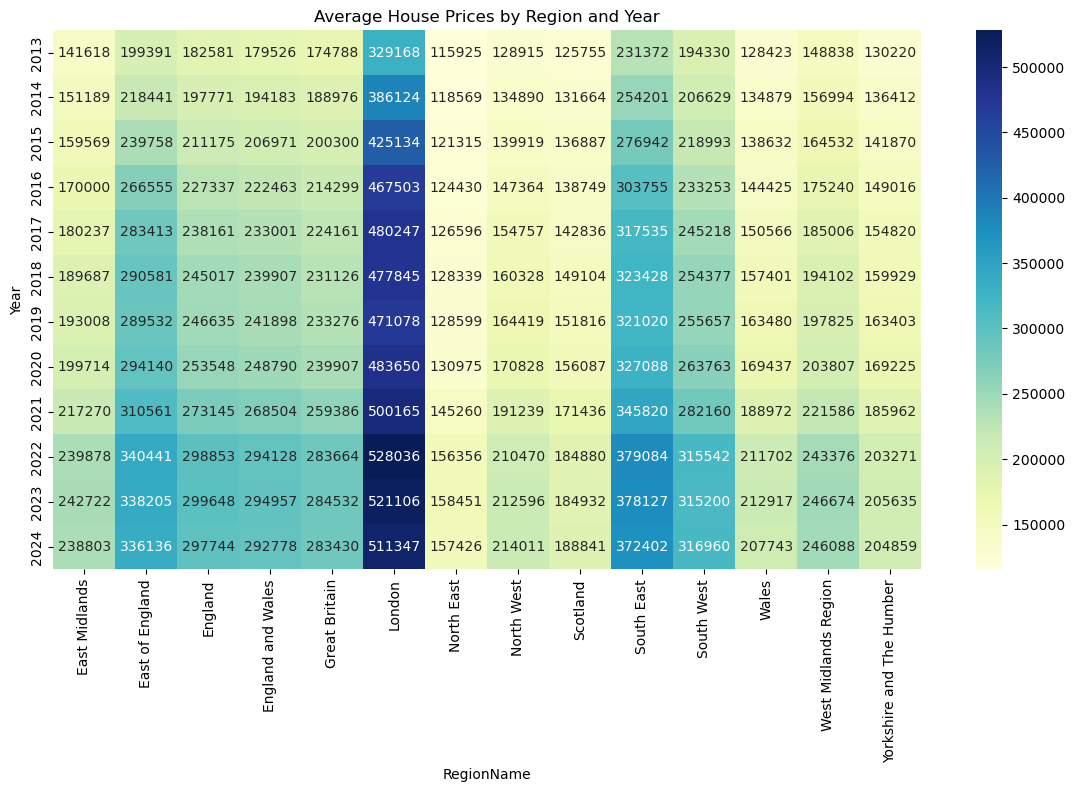

In [7]:
# Create Heatmap of average prices by region and year
pivot_table = df.pivot_table(values='AveragePrice', index='Year', columns='RegionName', aggfunc='mean')
plt.figure(figsize=(14, 7))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".0f")
plt.title('Average House Prices by Region and Year')
plt.show()


In [8]:
# Filter for the last 10 years (2013-2023)
df_filtered = df[(df['Date'].dt.year >= 2013) & (df['Date'].dt.year <= 2023)]
# Filter for the last 10 years (2003-2013)

print(df_filtered.info())
print(df_filtered.head())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1848 entries, 38184 to 140576
Data columns (total 56 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    1848 non-null   datetime64[ns]
 1   RegionName              1848 non-null   object        
 2   AreaCode                1848 non-null   object        
 3   AveragePrice            1848 non-null   float64       
 4   Index                   1848 non-null   float64       
 5   IndexSA                 1848 non-null   float64       
 6   1m%Change               1848 non-null   float64       
 7   12m%Change              1848 non-null   float64       
 8   AveragePriceSA          1848 non-null   float64       
 9   SalesVolume             1848 non-null   float64       
 10  DetachedPrice           1848 non-null   float64       
 11  DetachedIndex           1848 non-null   float64       
 12  Detached1m%Change       1848 non-null   fl

In [24]:
# Group by year to get average prices for each property type
group_df = df_filtered.groupby('Year').agg({
    'DetachedPrice': 'mean',
    'SemiDetachedPrice': 'mean',
    'TerracedPrice': 'mean',
    'FlatPrice': 'mean'
}).reset_index()


In [25]:

# Melt the dataframe to do make easier plotting with seaborn
melt_df = group_df.melt(id_vars=['Year'], value_vars=['DetachedPrice', 'SemiDetachedPrice', 'TerracedPrice', 'FlatPrice'], 
                            var_name='PropertyType', value_name='AveragePrice')

# Set the style for the plot
sns.set(style="whitegrid")

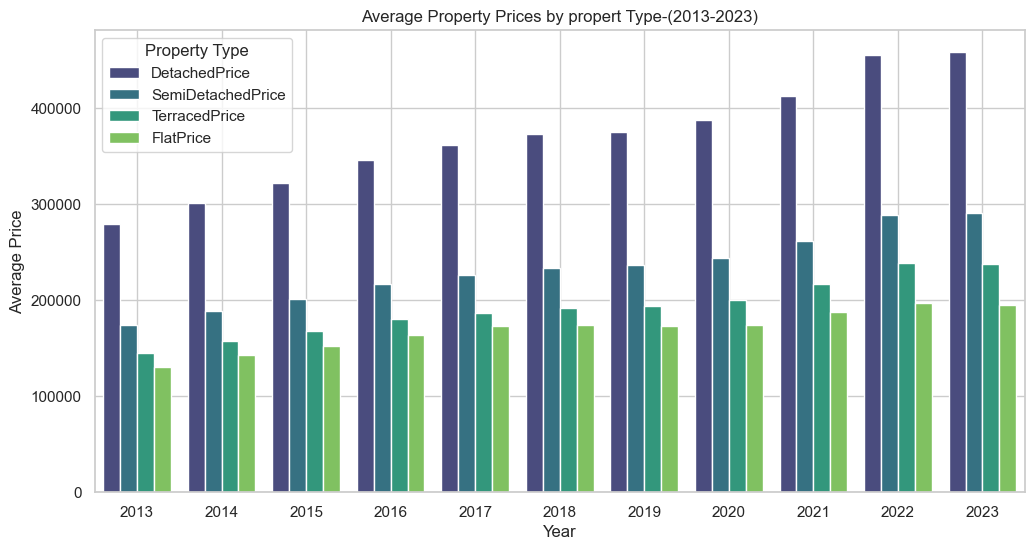

In [26]:
# Create the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=melt_df, x='Year', y='AveragePrice', hue='PropertyType', palette='viridis')

# Add title and labels to bar chart
plt.title('Average Property Prices by propert Type-(2013-2023)')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.legend(title='Property Type')
plt.grid(True)

# Show the result of bar chart
plt.show()




In [14]:

pip install pandas plotly dash


Note: you may need to restart the kernel to use updated packages.


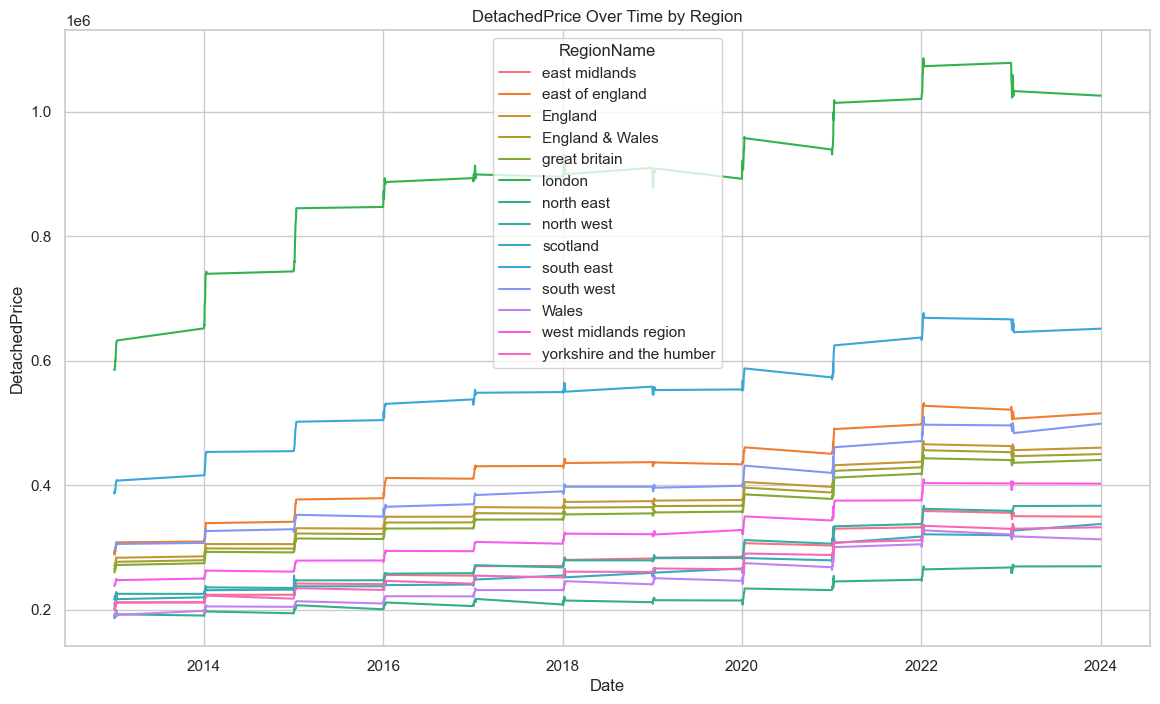

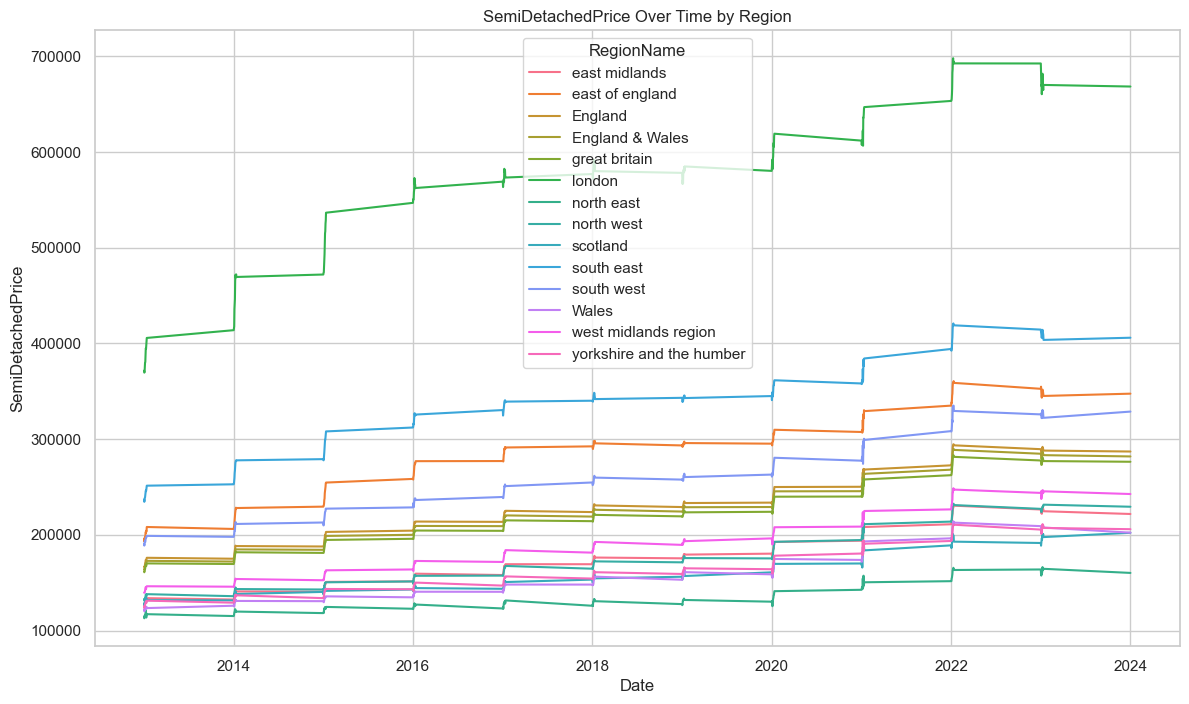

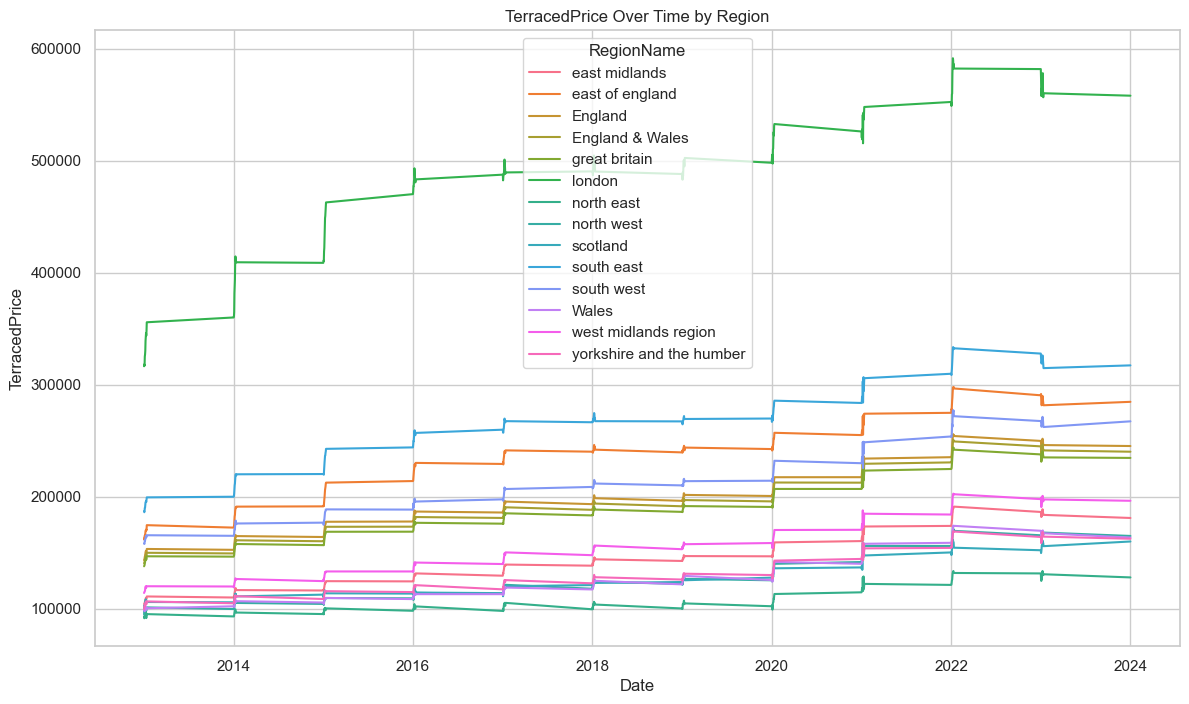

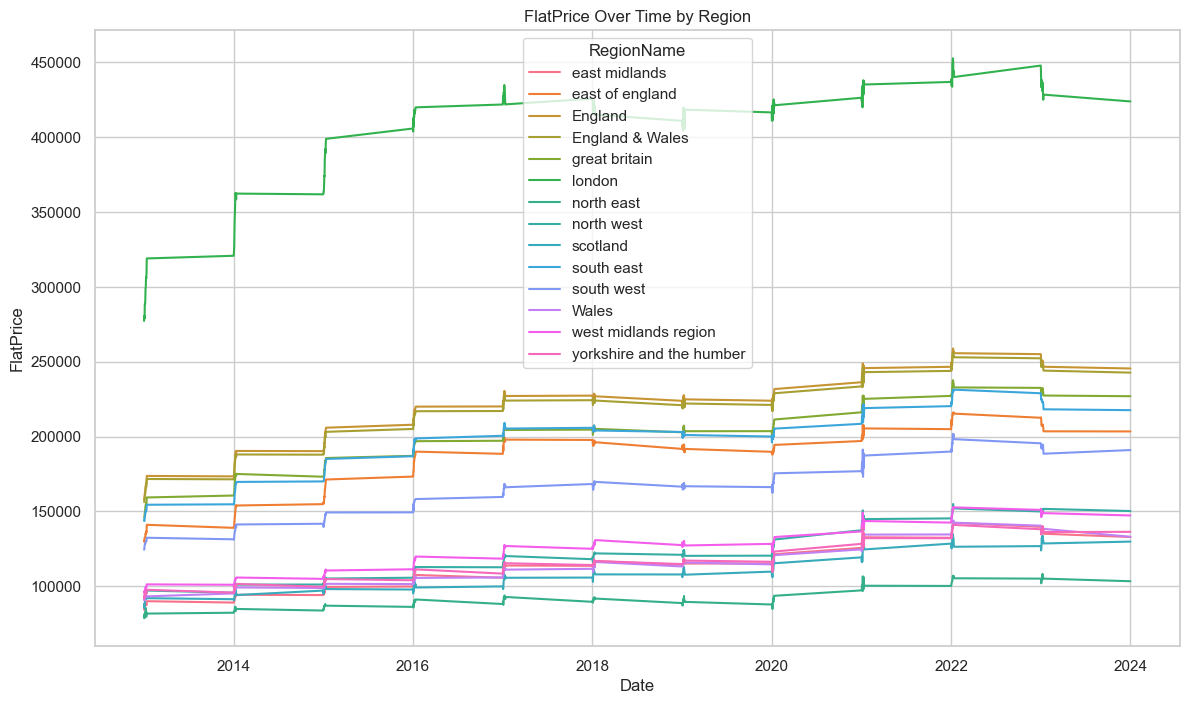

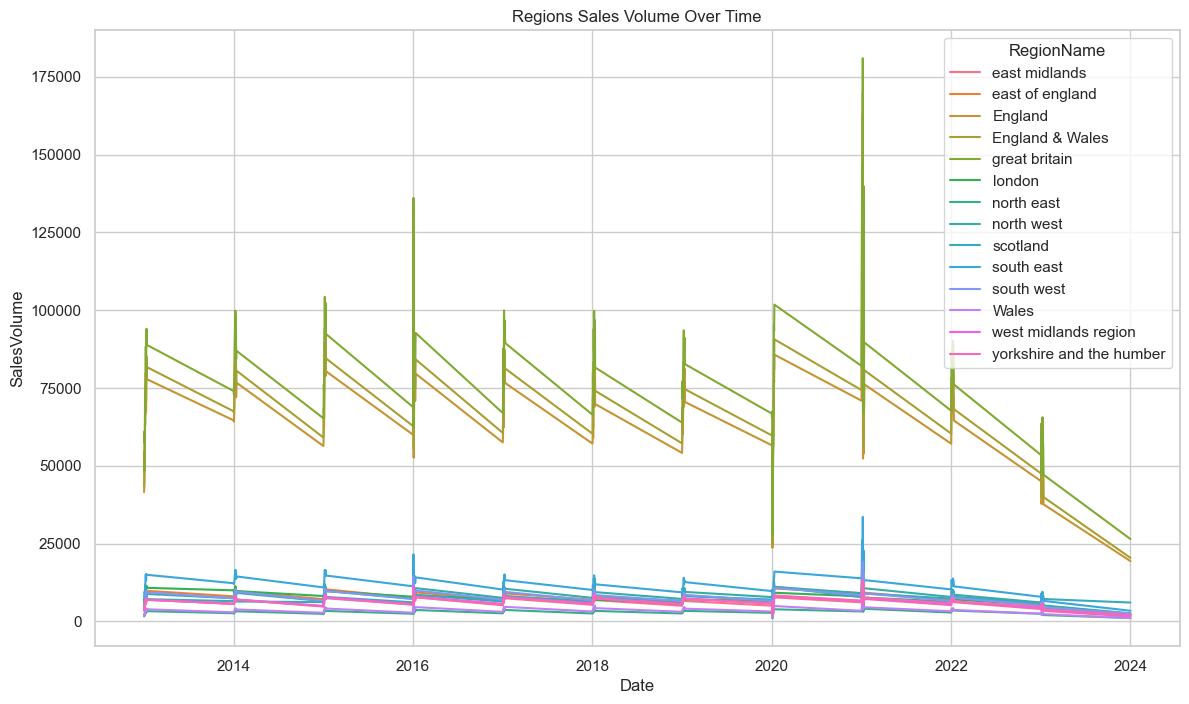

In [27]:
# Make Line plots for different property types
property_types = ['DetachedPrice', 'SemiDetachedPrice', 'TerracedPrice', 'FlatPrice']
for prop in property_types:
    plt.figure(figsize=(14, 8))
    sns.lineplot(data=df, x='Date', y=prop, hue='RegionName')
    plt.title(f'{prop} Over Time by Region')
    plt.show()

# Show Sales volume trends
plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x='Date', y='SalesVolume', hue='RegionName')
plt.title('Regions Sales Volume Over Time')
plt.show()


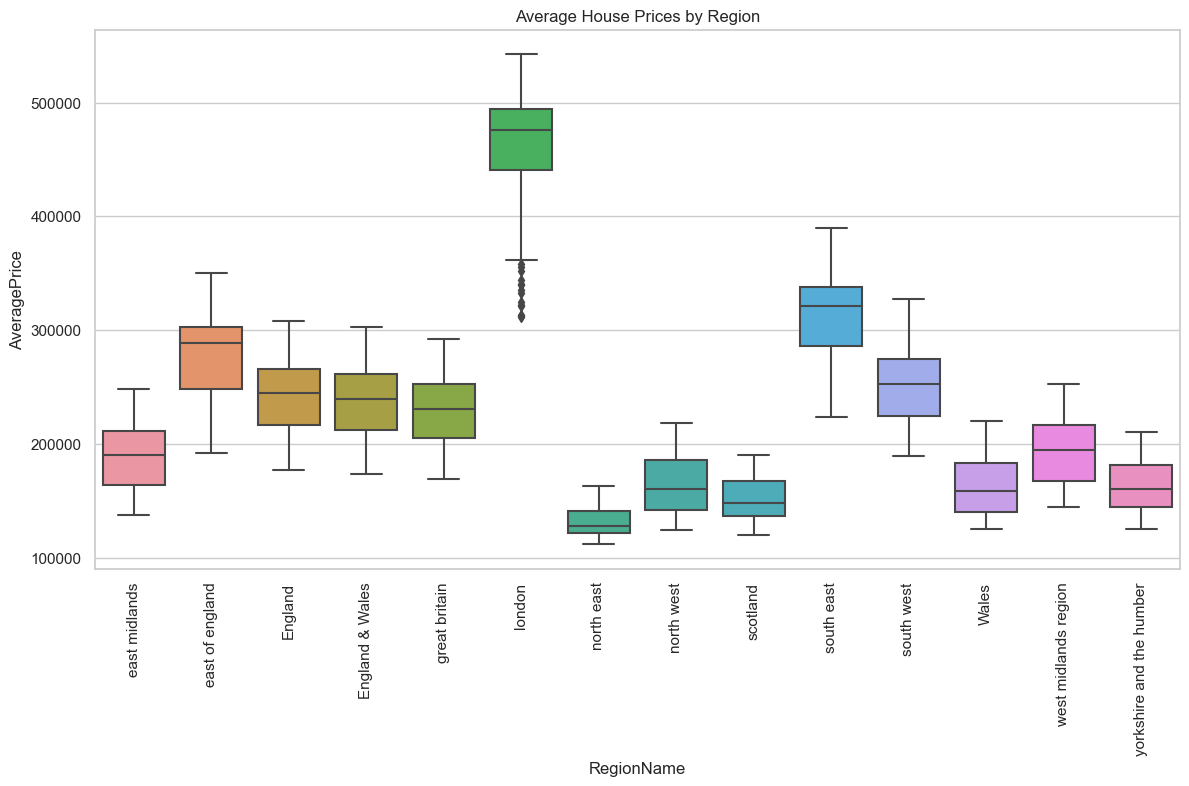

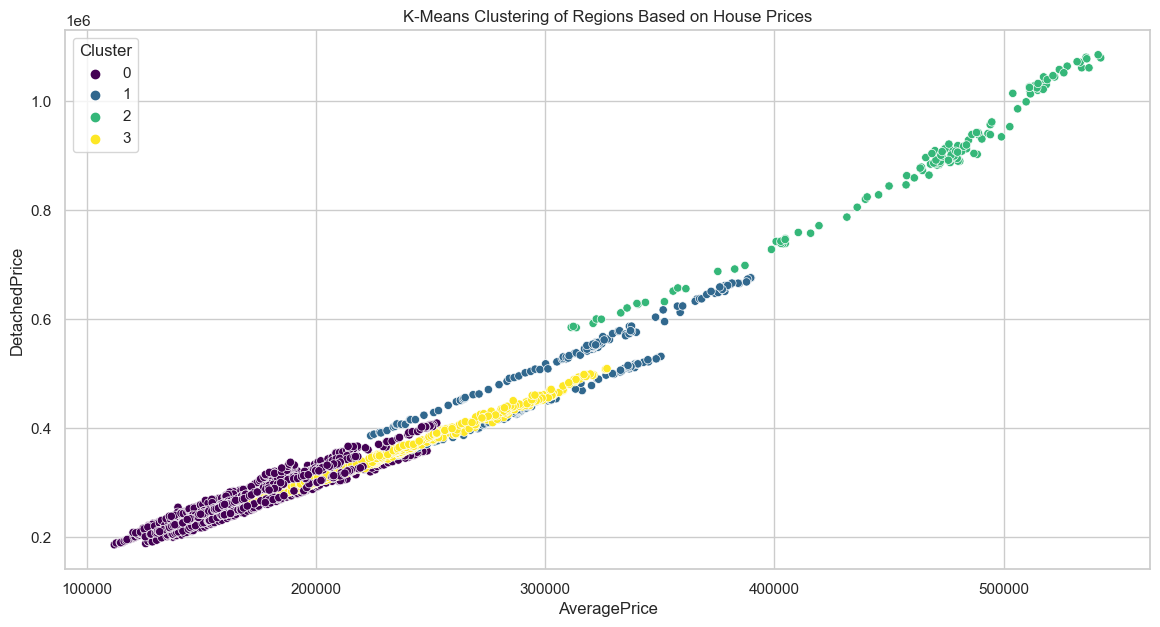

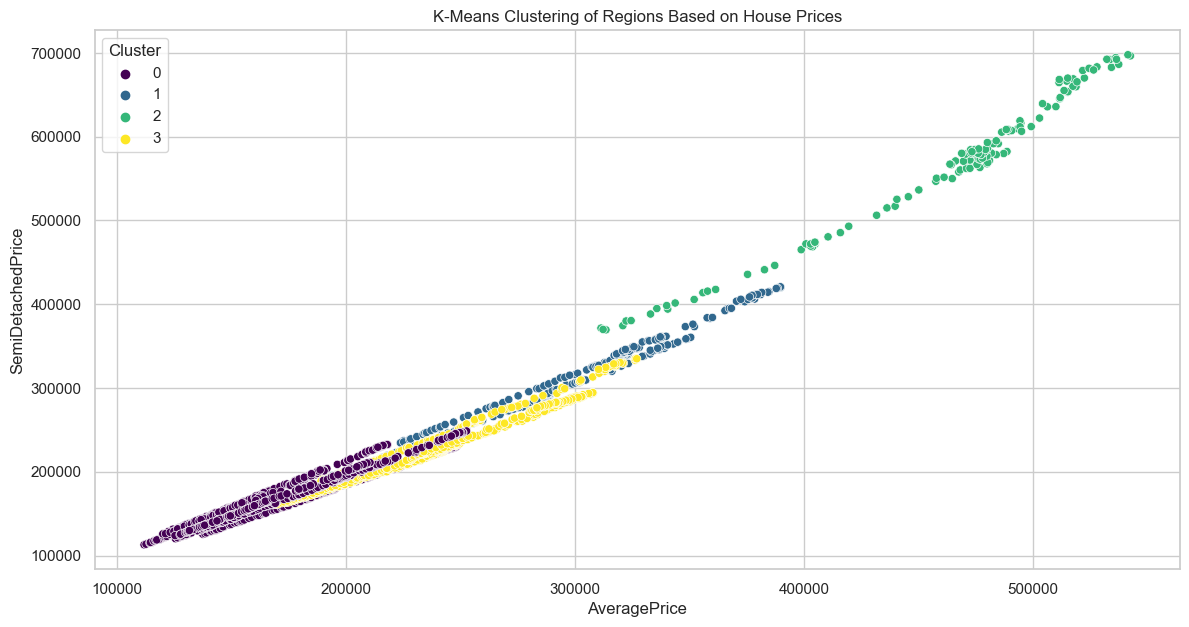

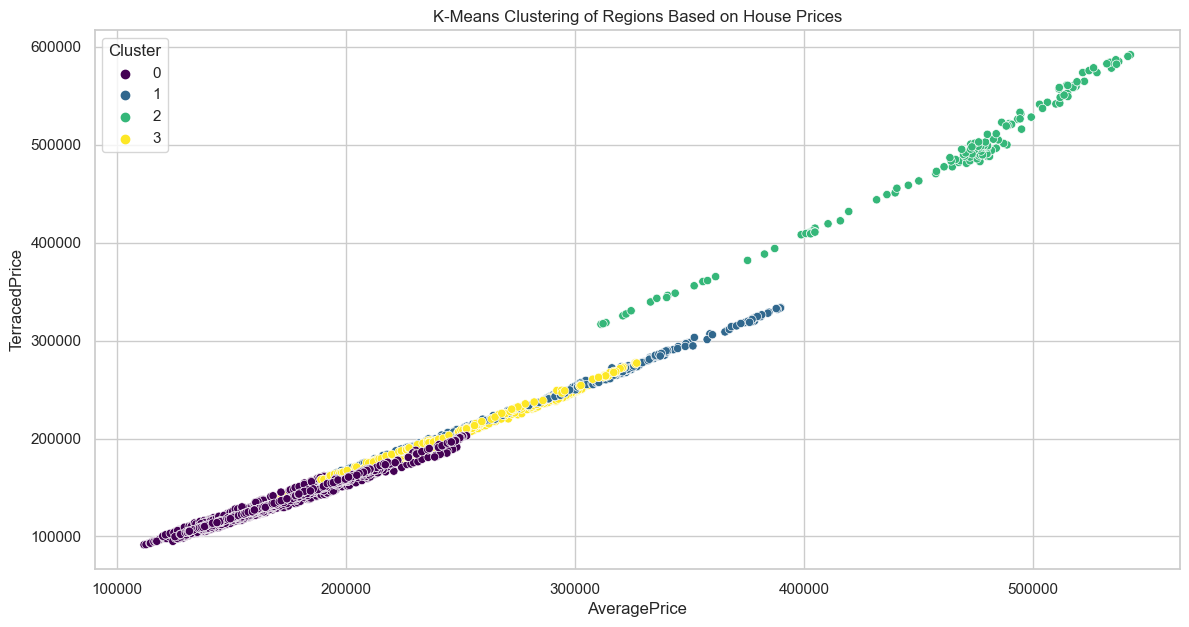

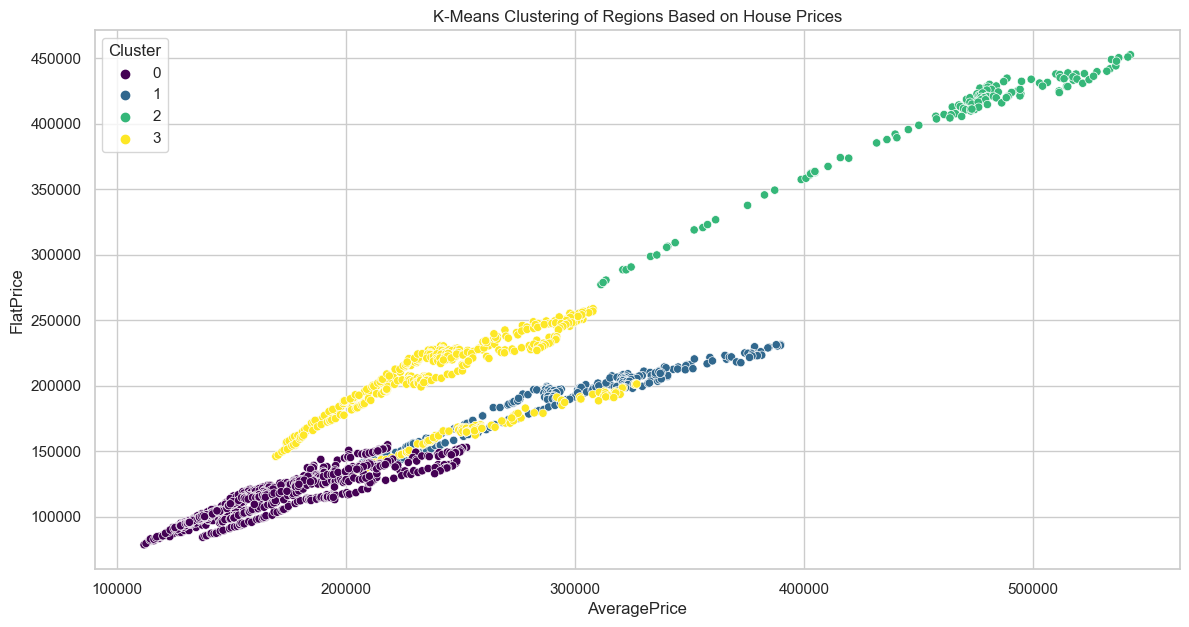

In [22]:
# comparison of Prices by Regional 
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='RegionName', y='AveragePrice')
plt.title('Average House Prices by Region')
plt.xticks(rotation=90)
plt.show()

# Clustering analysis process
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select relevant features for clustering
features = df[['RegionName', 'AveragePrice', 'DetachedPrice', 'SemiDetachedPrice', 'TerracedPrice', 'FlatPrice']].groupby('RegionName').mean()

# Scale the features
scaler = StandardScaler()
scaled_feature = scaler.fit_transform(features)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(scaled_feature)

# Add cluster labels to the original data
df['Cluster'] = df['RegionName'].map(dict(zip(features.index, clusters)))

# Visualize clusters for DetachedPrice
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x='AveragePrice', y='DetachedPrice', hue='Cluster', palette='viridis', legend='full')
plt.title('K-Means Clustering of Regions Based on House Prices')
plt.show()

# Visualizing clusters SemiDetachedPrice
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x='AveragePrice', y='SemiDetachedPrice', hue='Cluster', palette='viridis', legend='full')
plt.title('K-Means Clustering of Regions Based on House Prices')
plt.show()

# Visualizing clusters for TerracedPrice
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x='AveragePrice', y='TerracedPrice', hue='Cluster', palette='viridis', legend='full')
plt.title('K-Means Clustering of Regions Based on House Prices')
plt.show()

# Visualize clusters for FlatPrice
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x='AveragePrice', y='FlatPrice', hue='Cluster', palette='viridis', legend='full')
plt.title('K-Means Clustering of Regions Based on House Prices')
plt.show()




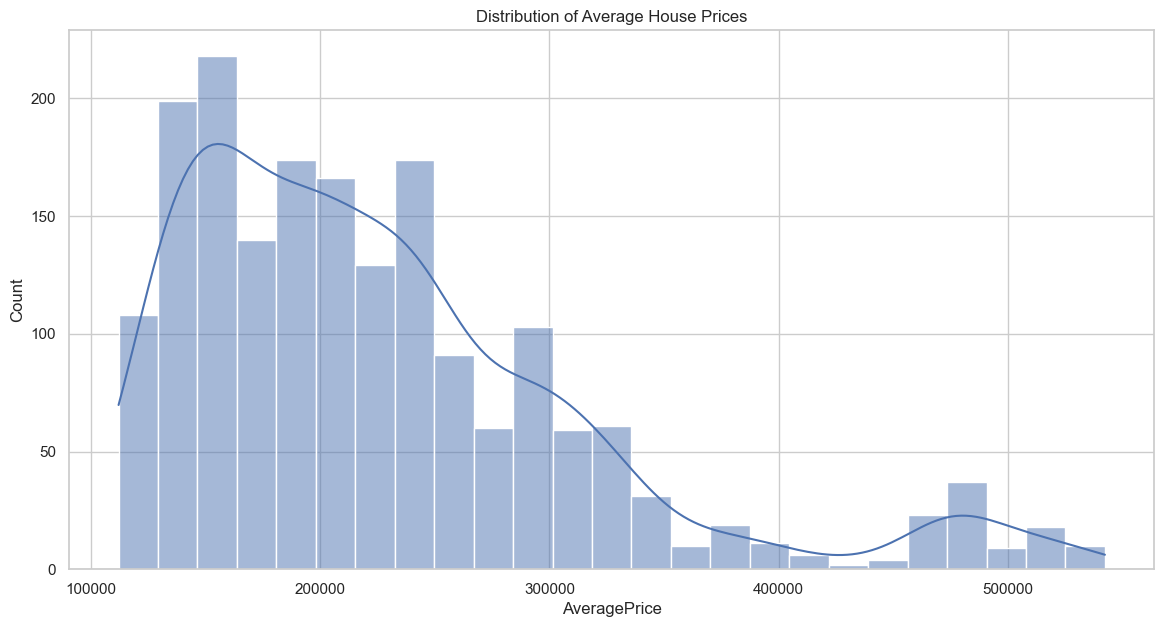

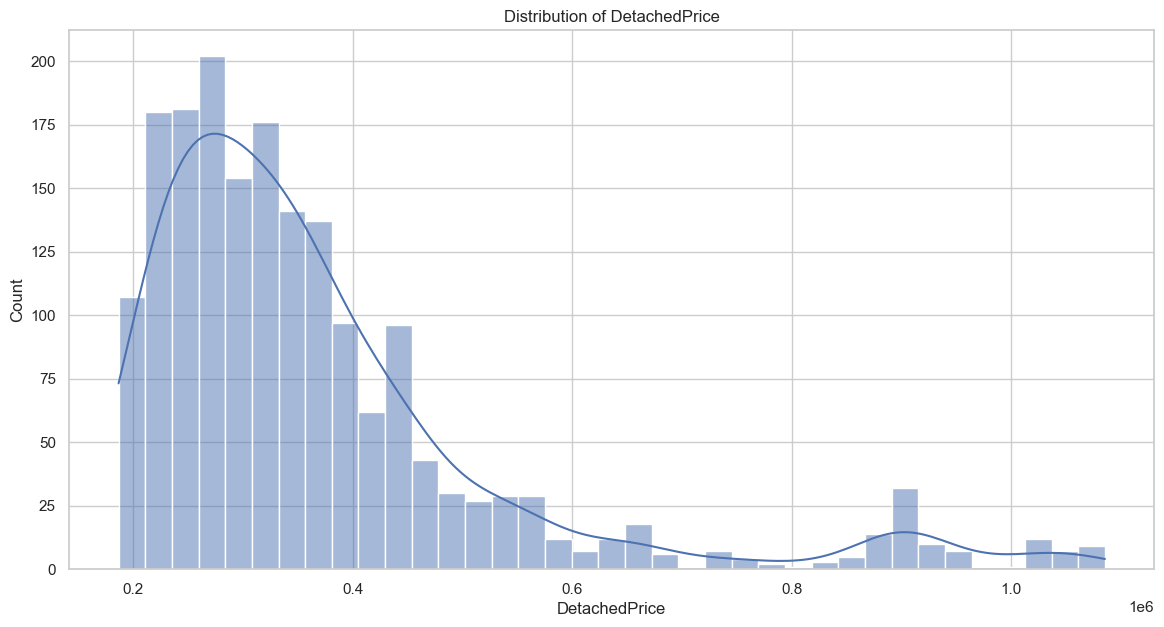

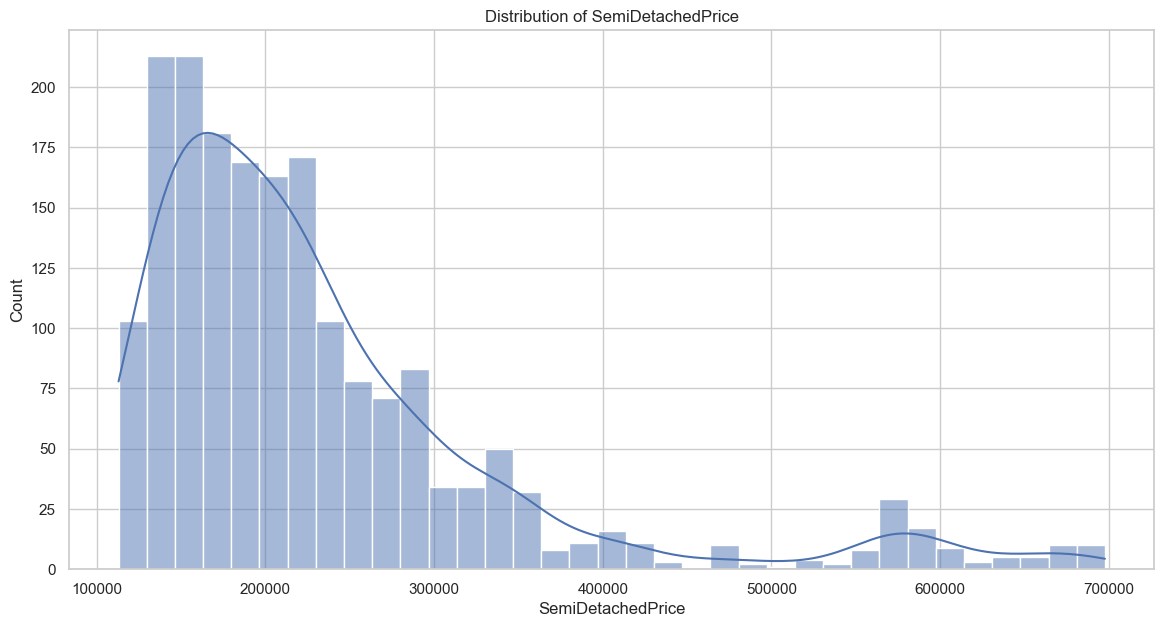

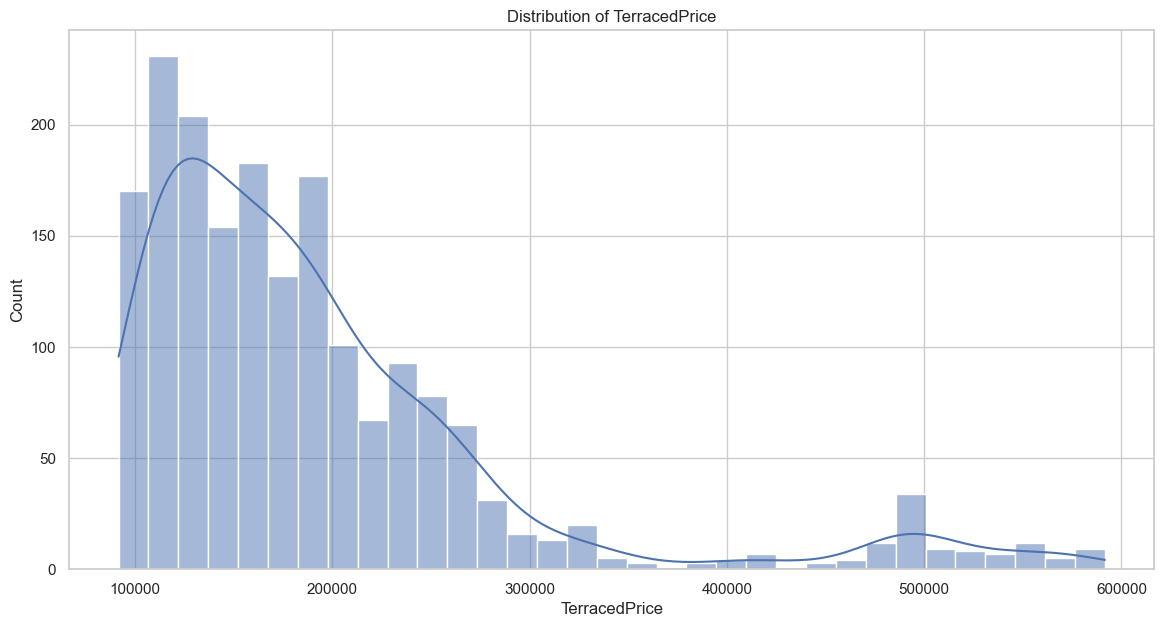

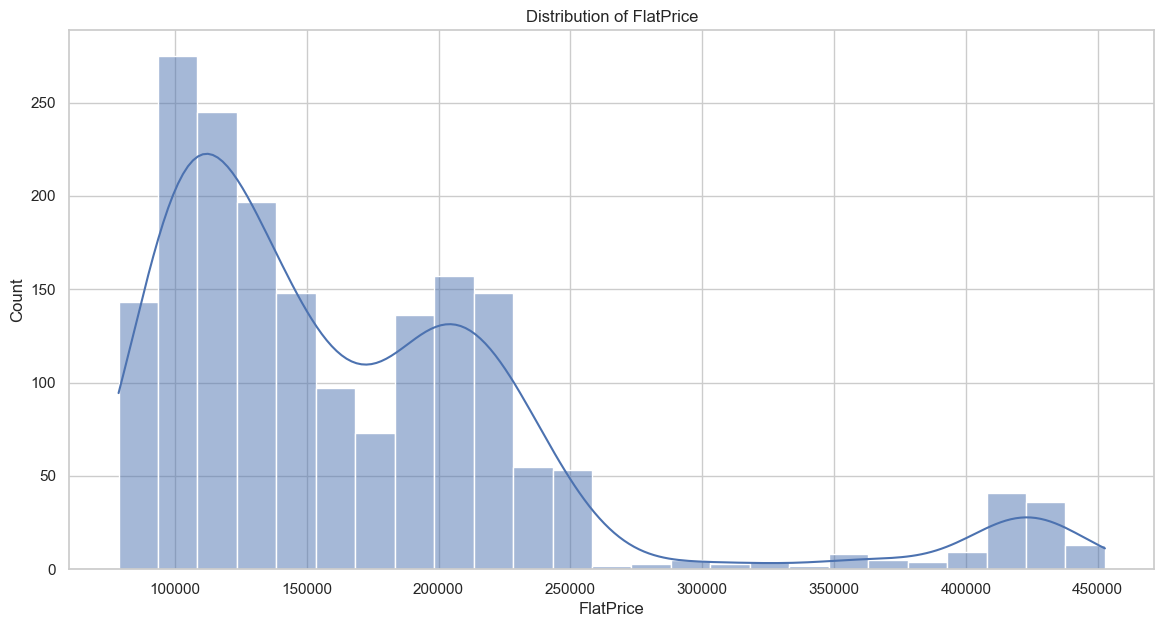

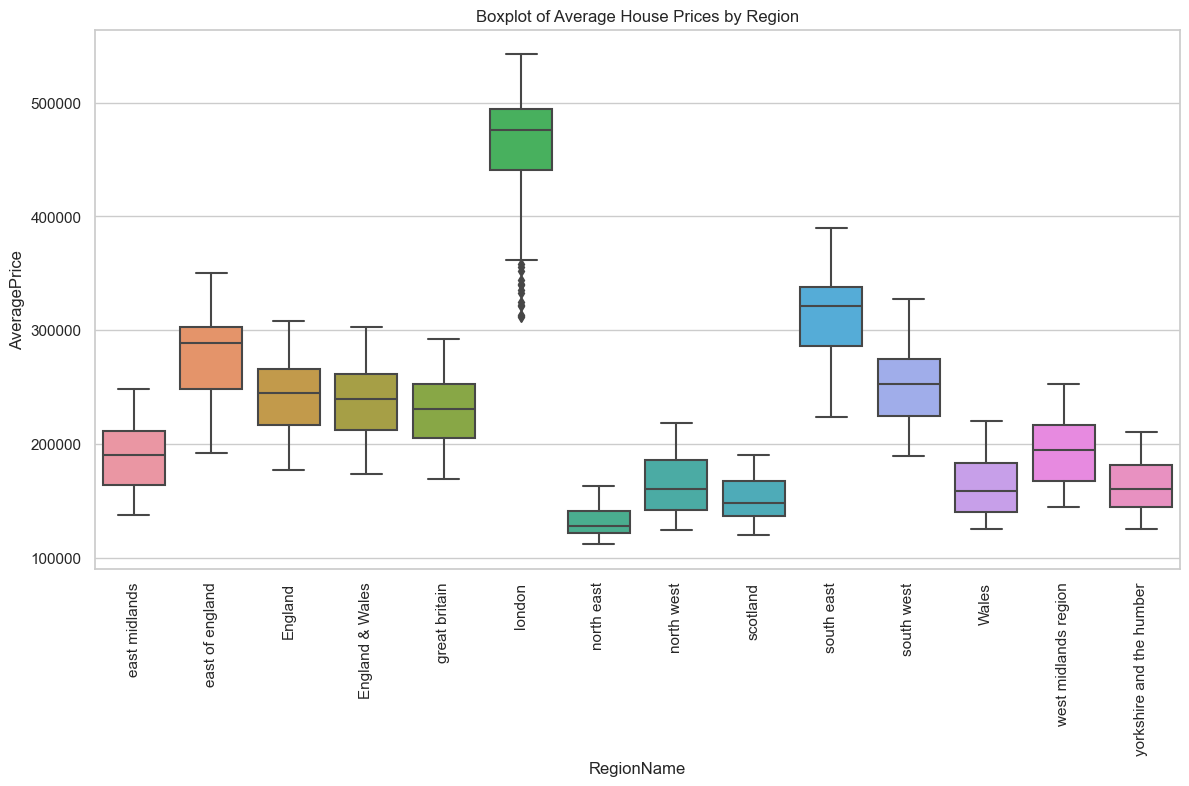

In [28]:
# Distribution of house prices
plt.figure(figsize=(14, 7))
sns.histplot(data=df, x='AveragePrice', kde=True)
plt.title('Distribution of Average House Prices')
plt.show()

# Price distribution by property type
property_types = ['DetachedPrice', 'SemiDetachedPrice', 'TerracedPrice', 'FlatPrice']
for prop in property_types:
    plt.figure(figsize=(14, 7))
    sns.histplot(data=df, x=prop, kde=True)
    plt.title(f'Distribution of {prop}')
    plt.show()

# Identifying outliers
plt.figure(figsize=(14, 7))
sns.boxplot(data=df, x='RegionName', y='AveragePrice')
plt.title('Boxplot of Average House Prices by Region')
plt.xticks(rotation=90)
plt.show()
